<center><h1>TMDB Movies</h1></center>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#TMDB-Movies" data-toc-modified-id="TMDB-Movies-1">TMDB Movies</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2">Introduction</a></span></li><li><span><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-3">Data Wrangling</a></span><ul class="toc-item"><li><span><a href="#Gather" data-toc-modified-id="Gather-3.1">Gather</a></span></li><li><span><a href="#Assess" data-toc-modified-id="Assess-3.2">Assess</a></span></li><li><span><a href="#Clean" data-toc-modified-id="Clean-3.3">Clean</a></span></li><li><span><a href="#Saving-to-local-file" data-toc-modified-id="Saving-to-local-file-3.4">Saving to local file</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-4">Exploratory Data Analysis</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5">Conclusion</a></span></li><li><span><a href="#References" data-toc-modified-id="References-6">References</a></span></li></ul></div>

# Introduction

This project started as an assessment for the **Udacity Data Analysis Advanced Track**.

The Movie Database (TMDb) is a community built movie and TV database dating back to 2008.
This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue.


# Asking Questions

During our data wrangling and analysis we will try to answer the following questions:

- How did the movie industry budget and revenue changed over the years?
- How is the voting (rating) is distributed?
- How does the TMDB average vote compares to the IMDB ratings?
- What factors affect the rating of a given movie (budget, revenue, release month, release year,...)?
- What are the most popular movies, genres, cast members and production companies?

# Data Wrangling

We begin by importing the libraries that we will be using for our analysis:
- [Numpy](https://numpy.org/)
- [Pandas](https://pandas.pydata.org/)
- [Matplotlib](https://matplotlib.org/stable/index.html#)
- [Seaborn](https://seaborn.pydata.org/)
- [Requests](https://2.python-requests.org/en/master/)
- [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/)

In [1]:
# importing required libraries
from bs4 import BeautifulSoup
import requests
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Gather

### TMDB Data

We can read the TMDB data directly from the `tmdb-movies.csv` file

In [2]:
df_tmdb = pd.read_csv('tmdb-movies.csv', index_col='id')
df_tmdb.sample(3)

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
299729,tt3995006,0.076280,0,0,Banksy Does New York,NaN,NaN,Chris Moukarbel,The street is at play.,new york|graffiti|chaos|art,"On October 1, 2013, the elusive street artist ...",79,Documentary,Home Box Office (HBO)|Matador Content|Permanen...,11/17/14,22,6.8,2014,0.000000e+00,0.000000e+00
13435,tt0168786,0.364807,12500000,23367586,Antwone Fisher,Derek Luke|Malcolm David Kelley|Cory Hodges|De...,NaN,Denzel Washington,Antwone Fisher is at war... with himself.,us navy|biography,A sailor prone to violent outbursts is sent to...,120,Drama|Romance,Fox Searchlight,12/19/02,76,6.6,2002,1.515327e+07,2.832762e+07
253617,tt3322904,0.364794,0,0,LEGO Marvel Super Heroes: Maximum Overload,Troy Baker|Drake Bell|Fred Tatasciore|Dee Brad...,http://marvel.com/news/tv/2013/11/5/21463/watc...,Greg Richardson,NaN,marvel comic|superhero|superheroine|superhero ...,Maximum Overload features LEGO Spider-Man and ...,22,Action|Animation|Comedy,Arc Productions,11/5/13,26,7.1,2013,0.000000e+00,0.000000e+00


Note that the final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


In [3]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               10856 non-null  object 
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   homepage              2936 non-null   object 
 7   director              10822 non-null  object 
 8   tagline               8042 non-null   object 
 9   keywords              9373 non-null   object 
 10  overview              10862 non-null  object 
 11  runtime               10866 non-null  int64  
 12  genres                10843 non-null  object 
 13  production_companies  9836 non-null   object 
 14  release_date          10866 non-null  object 
 15  vote_count    

### IMDB Data

To compare the TMDB ratings with the IMDB ratings. we can scrape the IMDB ratings using their `imdb_id` provided from the TMDB database.

I tried to scrape the data first using BeautifulSoup library, but the scraping process was taking more than 4 hours which was not efficient. Instead it was decided to better download it manualy from the following url:
https://datasets.imdbws.com/ and then it can be read into a pandas Dataframe using the `read_csv` method with '\t' as the separator since the downloaded files where in .tsv format.



In [4]:
df_imdb = pd.read_csv('title.ratings.tsv', sep='\t')

df_imdb.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1680
1,tt0000002,6.0,207
2,tt0000003,6.5,1418
3,tt0000004,6.1,122
4,tt0000005,6.1,2214


## Assess

We first check if there's any duplicated values in the `df_tmdb` DataFrame.

In [5]:
df_tmdb[df_tmdb.duplicated()]

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [6]:
df_tmdb[df_tmdb['original_title'] == 'TEKKEN']

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


Only one row is duplicated which is the title 'TEKKEN' with the exact same data.So, it can be safely removed.

In [7]:
df_tmdb.isnull().sum()

imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

The columns 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres' and 'production_companies' have Null values.

In [8]:
df_tmdb.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Investigating the table above, the `budget`, `revenue`, `runtime`, `budget_adj` and `revenue_adj` contain zero values.

In [9]:
# check for entries where budget or revenue equals 0
df_tmdb.query(
    'budget == 0 or revenue == 0 or budget_adj == 0 or revenue_adj == 0 or runtime == 0').shape

(7011, 20)

7011 rows have 0 budget or revenue or 0 runtime.

In [10]:
df_tmdb.dtypes

imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [11]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1123371 entries, 0 to 1123370
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1123371 non-null  object 
 1   averageRating  1123371 non-null  float64
 2   numVotes       1123371 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 25.7+ MB


The `df_imdb` dataframe contains the right vriable types. but will need to be merged with the TMDB data for analysis.

### Quality Issues

1. missing data in the following columns: `imdb_id`, `cast`, `homepage`, `director`, `tagline`, `keywords`, `overview`,  `genres` and `production_companies`
2. Zero values found in columns: `budget`, `revenue`, `budget_adj`, `revenue_adj` and `runtime`.
3. The columns `cast`, `keywords` `genres` and `production_companies` contains strings separated by '|' instead of a list of items.
4. `release_date` column is of type string instead of datetime. 

### Tidiness Issues
1. The columns `cast`, `keywords` `genres` and `production_companies` values exist as one entry. Needs adjustments to be able to analyze each cast member, keyword, genre or production company separately.
2. The IMDB DataFrame should be merged with the original TMDB DataFrame so that every row represent an observation.

## Clean

#### Define

- Remove Duplicates using pandas drop_duplicates function.

#### Code

In [12]:
df_clean = df_tmdb.drop_duplicates()

#### Test

In [13]:
df_clean.duplicated().any()

False

#### Define

Drop the columns that are not relevant to our analysis which are: `homepage`,`director`, `tagline`, `overview`.

#### Code

In [14]:
df_clean = df_tmdb.drop(
    ['homepage', 'director', 'tagline', 'overview'], axis=1)

#### Test

In [15]:
df_clean.columns

Index(['imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'keywords', 'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

#### Define

Splitting the  `cast`, `keywords`, `genres` and `production_companies` columns using the str.split function with '|' as the separator.

Then we collect the unique values in all the columns by defining a custom function `to_1D` that converts the multi-dimensional arrays into one dimension and then getting the value counts of each column.

#### Code

In [16]:
# the columns to split
cols = ['cast', 'keywords', 'genres', 'production_companies']
# a dictionary to store unique values of each column
unique = {}


def to_1D(series):
    """
    converts a 2D series to a 1D series
    """
    return pd.Series([x for _list in series for x in _list], dtype='object')


for col in cols:
    df_clean[col] = df_clean[col].str.split('|')
    unique[col] = to_1D(df_clean[col].dropna()).value_counts().index

#### Test

In [17]:
df_clean.sample(3)

,imdb_id,popularity,budget,revenue,original_title,cast,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,
4296,tt0097883,0.252664,0,0,Millennium,"[Kris Kristofferson, Cheryl Ladd, Daniel J. Tr...","[airport, time warp, future, airplane, time tr...",108,"[Mystery, Drama, Science Fiction, Thriller]","[Gladden Entertainment, First Millenium Partne...",8/25/89,22,5.0,1989,0.000000e+00,0.000000e+00
15706,tt1051981,0.264137,0,0,Another Gay Sequel: Gays Gone Wild!,"[Jonah Blechman, Jake Mosser, Aaron Michael Da...",NaN,90,[Comedy],"[TLA Releasing, Luna Filmproduktion]",11/6/08,15,6.1,2008,0.000000e+00,0.000000e+00
10900,tt0409345,0.436441,3500000,1115493,Surveillance,"[Julia Ormond, Bill Pullman, Pell James, Carol...","[police brutality, mass murder, camera, hearin...",97,[Thriller],"[Blue Rider Pictures, Lago Films, See Film]",2/8/08,35,6.0,2008,3.544753e+06,1.129756e+06


In [18]:
unique

{'cast': Index(['Robert De Niro', 'Samuel L. Jackson', 'Bruce Willis', 'Nicolas Cage',
        'Michael Caine', 'Robin Williams', 'John Cusack', 'Morgan Freeman',
        'John Goodman', 'Liam Neeson',
        ...
        'Raymond Santana', 'Alex Scott', 'Joe Jackson', 'John Kerr',
        'Bonita DeCarlo', 'Regina Advento', 'Brandon Ratcliff', 'Sibel Kekilli',
        'Johan Urb', 'Dawn Dunlap'],
       dtype='object', length=19026),
 'keywords': Index(['woman director', 'independent film', 'based on novel', 'sex', 'sport',
        'murder', 'musical', 'biography', 'new york', 'suspense',
        ...
        'lubricant', 'tutor', 'needle', 'gorgon', 'trolley', 'female ninja',
        'old man', 'salmon', 'skateboard', 'threat'],
       dtype='object', length=7878),
 'genres': Index(['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Horror',
        'Adventure', 'Crime', 'Family', 'Science Fiction', 'Fantasy', 'Mystery',
        'Animation', 'Documentary', 'Music', 'History', 'War',

#### Define

- fix the runtime zero values by replacing them with the mean value.

#### Code

In [19]:
df_clean['runtime'].value_counts().sort_index()

0      31
2       5
3      11
4      17
5      17
       ..
561     1
566     1
705     1
877     1
900     1
Name: runtime, Length: 247, dtype: int64

In [20]:
df_clean['runtime'].replace(0, df_clean['runtime'].mean(), inplace=True)

#### Test

In [21]:
df_clean[df_clean['runtime'] == 0]

,imdb_id,popularity,budget,revenue,original_title,cast,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,


#### Define

- we can use the same technique for the budget and revenue columns

#### Code

In [22]:
for col in ['budget', 'revenue', 'budget_adj', 'revenue_adj']:
    df_clean[col].replace(0, df_clean[col].mean(), inplace=True)

#### Test

In [23]:
for col in ['budget', 'revenue', 'budget_adj', 'revenue_adj']:
    print(df_clean[df_clean[col] == 0][col].count())

0
0
0
0


#### Define

- Extract the release month from the release date by splitting into columns using the str.split function with '/' as the separator and get only the month as the date format is MM/DD/YY.

#### Code

In [24]:
df_clean['release_month'] = df_clean['release_date'].str.split(
    '/', expand=True)[0]


In [25]:
# convert the release month column to Integer type
df_clean['release_month'] = df_clean['release_month'].astype(int)

#### Test

In [26]:
df_clean['release_month'].value_counts()

9     1331
10    1153
12     985
1      919
8      918
6      827
3      823
11     814
5      809
7      799
4      797
2      691
Name: release_month, dtype: int64

#### Define

- In order to merge the IMDB Data into the TMDB one, we need to first clean the imdb dataframe and name the columns accordingly.


#### Code

In [27]:
df_imdb.columns = ['imdb_id', 'imdb_rating', 'imdb_votes']

#### Test

In [28]:
df_imdb.columns

Index(['imdb_id', 'imdb_rating', 'imdb_votes'], dtype='object')

#### Define

we now need to merge the two dataframes using the merge method.

#### Code

In [29]:
df_clean = df_clean.merge(df_imdb, on='imdb_id')

#### Test

In [30]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10852 entries, 0 to 10851
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               10852 non-null  object 
 1   popularity            10852 non-null  float64
 2   budget                10852 non-null  float64
 3   revenue               10852 non-null  float64
 4   original_title        10852 non-null  object 
 5   cast                  10776 non-null  object 
 6   keywords              9366 non-null   object 
 7   runtime               10852 non-null  float64
 8   genres                10831 non-null  object 
 9   production_companies  9827 non-null   object 
 10  release_date          10852 non-null  object 
 11  vote_count            10852 non-null  int64  
 12  vote_average          10852 non-null  float64
 13  release_year          10852 non-null  int64  
 14  budget_adj            10852 non-null  float64
 15  revenue_adj        

## Saving to local file

Now that we have successfully cleaned our data, we need to save to and external file to use it later in our analysis.

In [31]:
df_clean.to_csv('tmdb-clean.csv', index=False)

# Exploratory Data Analysis

In [32]:
df = pd.read_csv('tmdb-clean.csv', index_col='imdb_id')

In [33]:
df.head(3)

,popularity,budget,revenue,original_title,cast,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,imdb_rating,imdb_votes
imdb_id,,,,,,,,,,,,,,,,,,
tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,"['Chris Pratt', 'Bryce Dallas Howard', 'Irrfan...","['monster', 'dna', 'tyrannosaurus rex', 'veloc...",124.0,"['Action', 'Adventure', 'Science Fiction', 'Th...","['Universal Studios', 'Amblin Entertainment', ...",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,6,7.0,580217
tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,"['Tom Hardy', 'Charlize Theron', 'Hugh Keays-B...","['future', 'chase', 'post-apocalyptic', 'dysto...",120.0,"['Action', 'Adventure', 'Science Fiction', 'Th...","['Village Roadshow Pictures', 'Kennedy Miller ...",5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,5,8.1,884401
tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,"['Shailene Woodley', 'Theo James', 'Kate Winsl...","['based on novel', 'revolution', 'dystopia', '...",119.0,"['Adventure', 'Science Fiction', 'Thriller']","['Summit Entertainment', 'Mandeville Films', '...",3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,3,6.2,218262


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10852 entries, tt0369610 to tt0060666
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10852 non-null  float64
 1   budget                10852 non-null  float64
 2   revenue               10852 non-null  float64
 3   original_title        10852 non-null  object 
 4   cast                  10776 non-null  object 
 5   keywords              9366 non-null   object 
 6   runtime               10852 non-null  float64
 7   genres                10831 non-null  object 
 8   production_companies  9827 non-null   object 
 9   release_date          10852 non-null  object 
 10  vote_count            10852 non-null  int64  
 11  vote_average          10852 non-null  float64
 12  release_year          10852 non-null  int64  
 13  budget_adj            10852 non-null  float64
 14  revenue_adj           10852 non-null  float64
 15  release_mont

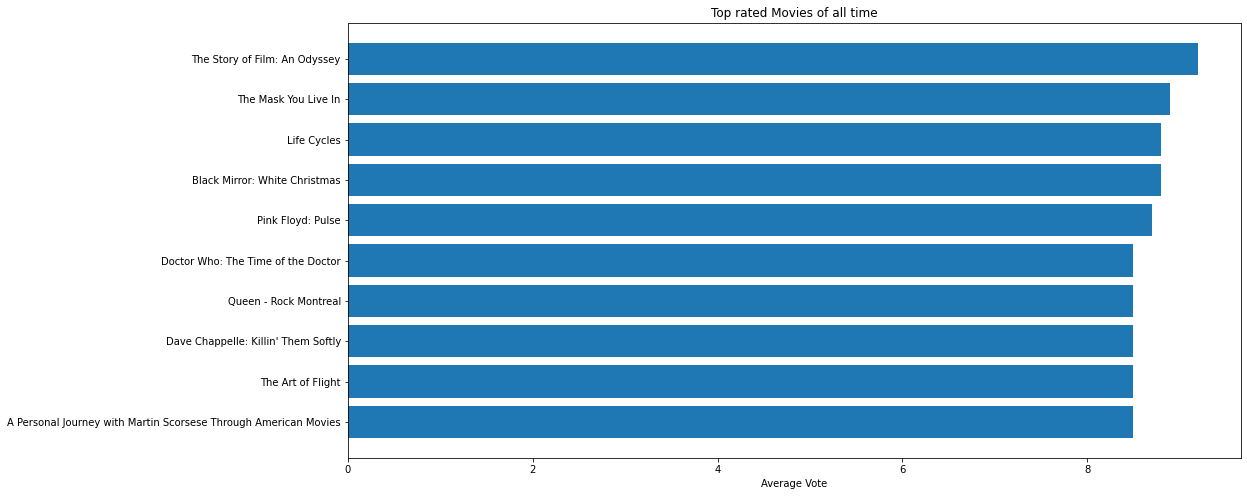

In [235]:
data = df.sort_values('vote_average',ascending=False).head(10)
y = data['original_title']
x =data['vote_average']

fig, ax = plt.subplots(figsize=(16,8))
ax.barh(y,x, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Average Vote')
ax.set_title('Top rated Movies of all time')

plt.show()



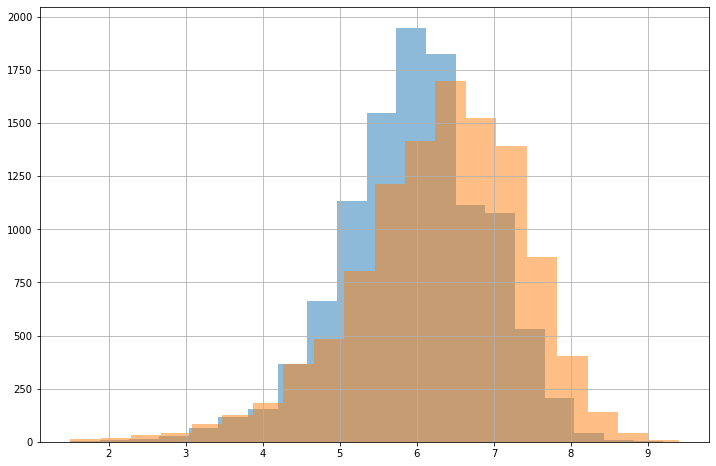

In [242]:
plt.figure(figsize=(12,8))

df['vote_average'].hist(bins=20, alpha = 0.5)
df['imdb_rating'].hist(bins=20, alpha=0.5)

plt.show()

<AxesSubplot:>

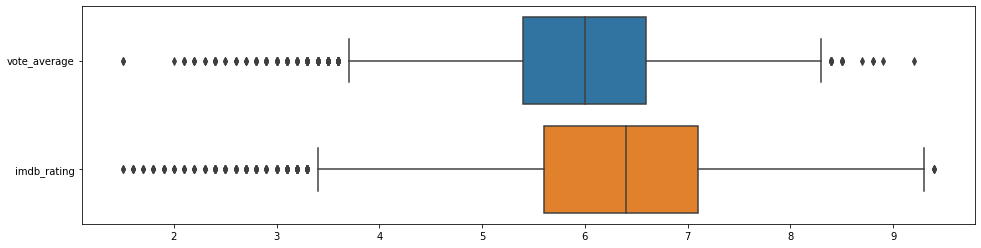

In [245]:
plt.figure(figsize=(16,4))

sns.boxplot(data = df[['vote_average','imdb_rating']],orient="h")


In [38]:
df[df['popularity']>1]

,popularity,budget,revenue,original_title,cast,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,imdb_rating,imdb_votes
imdb_id,,,,,,,,,,,,,,,,,,
tt0369610,32.985763,1.500000e+08,1.513529e+09,Jurassic World,"['Chris Pratt', 'Bryce Dallas Howard', 'Irrfan...","['monster', 'dna', 'tyrannosaurus rex', 'veloc...",124.0,"['Action', 'Adventure', 'Science Fiction', 'Th...","['Universal Studios', 'Amblin Entertainment', ...",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,6,7.0,580217
tt1392190,28.419936,1.500000e+08,3.784364e+08,Mad Max: Fury Road,"['Tom Hardy', 'Charlize Theron', 'Hugh Keays-B...","['future', 'chase', 'post-apocalyptic', 'dysto...",120.0,"['Action', 'Adventure', 'Science Fiction', 'Th...","['Village Roadshow Pictures', 'Kennedy Miller ...",5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,5,8.1,884401
tt2908446,13.112507,1.100000e+08,2.952382e+08,Insurgent,"['Shailene Woodley', 'Theo James', 'Kate Winsl...","['based on novel', 'revolution', 'dystopia', '...",119.0,"['Adventure', 'Science Fiction', 'Thriller']","['Summit Entertainment', 'Mandeville Films', '...",3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,3,6.2,218262
tt2488496,11.173104,2.000000e+08,2.068178e+09,Star Wars: The Force Awakens,"['Harrison Ford', 'Mark Hamill', 'Carrie Fishe...","['android', 'spaceship', 'jedi', 'space opera'...",136.0,"['Action', 'Adventure', 'Science Fiction', 'Fa...","['Lucasfilm', 'Truenorth Productions', 'Bad Ro...",12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,12,7.9,862213
tt2820852,9.335014,1.900000e+08,1.506249e+09,Furious 7,"['Vin Diesel', 'Paul Walker', 'Jason Statham',...","['car race', 'speed', 'revenge', 'suspense', '...",137.0,"['Action', 'Crime', 'Thriller']","['Universal Pictures', 'Original Film', 'Media...",4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,4,7.1,359951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt0078346,1.210324,5.500000e+07,3.002180e+08,Superman,"['Marlon Brando', 'Gene Hackman', 'Christopher...","['saving the world', 'journalist', 'dc comics'...",143.0,"['Adventure', 'Fantasy', 'Action', 'Science Fi...","['Warner Bros.', 'Dovemead Films', 'Film Expor...",12/14/78,518,6.7,1978,1.838485e+08,1.003539e+09,12,7.3,159445
tt0077651,1.198849,3.000000e+05,7.000000e+07,Halloween,"['Donald Pleasence', 'Jamie Lee Curtis', 'P.J....","['female nudity', 'nudity', 'mask', 'babysitte...",91.0,"['Horror', 'Thriller']","['Compass International Pictures', 'Falcon Int...",10/25/78,522,7.3,1978,1.002810e+06,2.339890e+08,10,7.7,233486
tt0077975,1.157930,2.700000e+06,1.410000e+08,Animal House,"['John Belushi', 'Tim Matheson', 'John Vernon'...","['female nudity', 'sex', 'nudity', 'collage', ...",109.0,['Comedy'],"['Universal Pictures', 'Oregon Film Factory', ...",7/27/78,230,6.7,1978,9.025292e+06,4.713208e+08,7,7.5,112165


In [39]:
df['budget_adj']

imdb_id
tt0369610    1.379999e+08
tt1392190    1.379999e+08
tt2908446    1.012000e+08
tt2488496    1.839999e+08
tt2820852    1.747999e+08
                 ...     
tt0060371    1.755104e+07
tt0060472    1.755104e+07
tt0060161    1.755104e+07
tt0061177    1.755104e+07
tt0060666    1.276423e+05
Name: budget_adj, Length: 10852, dtype: float64

<AxesSubplot:xlabel='budget_adj'>

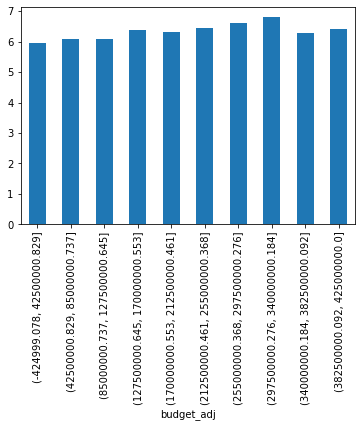

In [40]:
df.groupby(pd.cut(df['budget_adj'], 10))['vote_average'].mean().plot(kind='bar')

<AxesSubplot:xlabel='revenue_adj'>

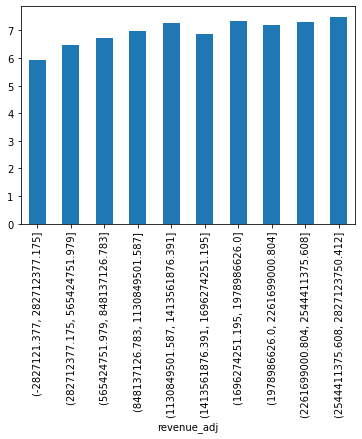

In [41]:
df.groupby(pd.cut(df['revenue_adj'], 10))['vote_average'].mean().plot(kind='bar')

<AxesSubplot:xlabel='release_year'>

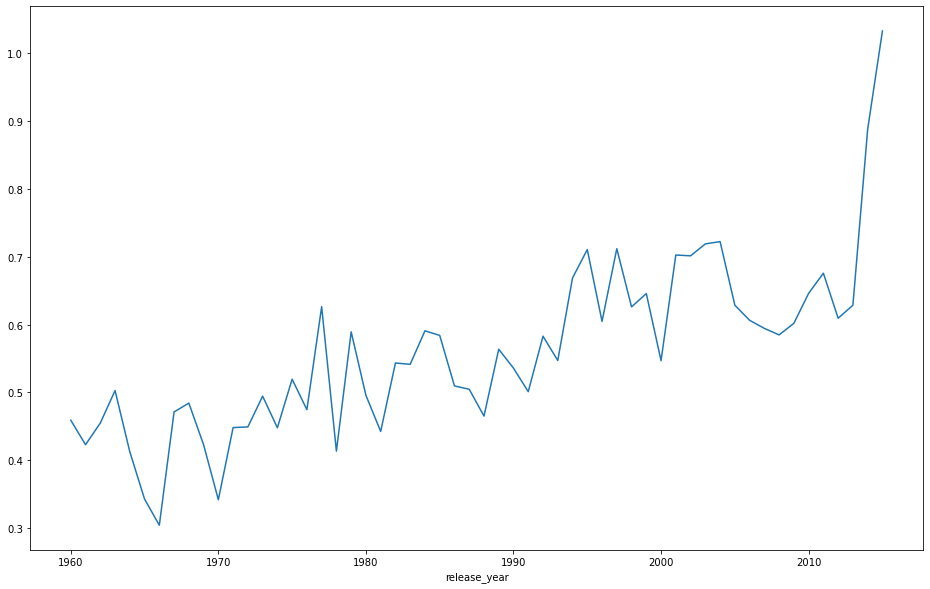

In [42]:
df.groupby(['release_year'])['popularity'].mean().plot(figsize=(16, 10))

<AxesSubplot:xlabel='release_year'>

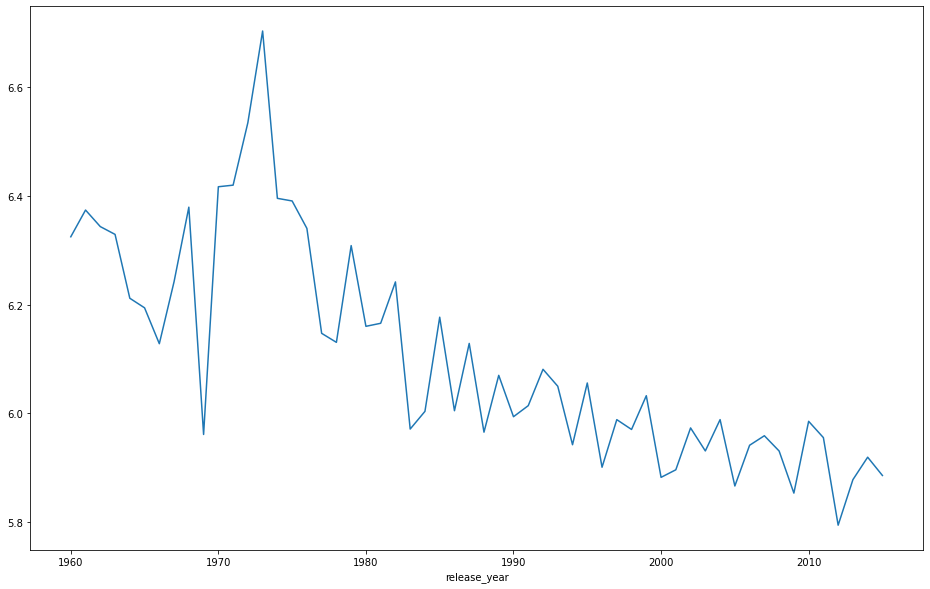

In [43]:
df.groupby(['release_year'])['vote_average'].mean().plot(figsize=(16, 10))

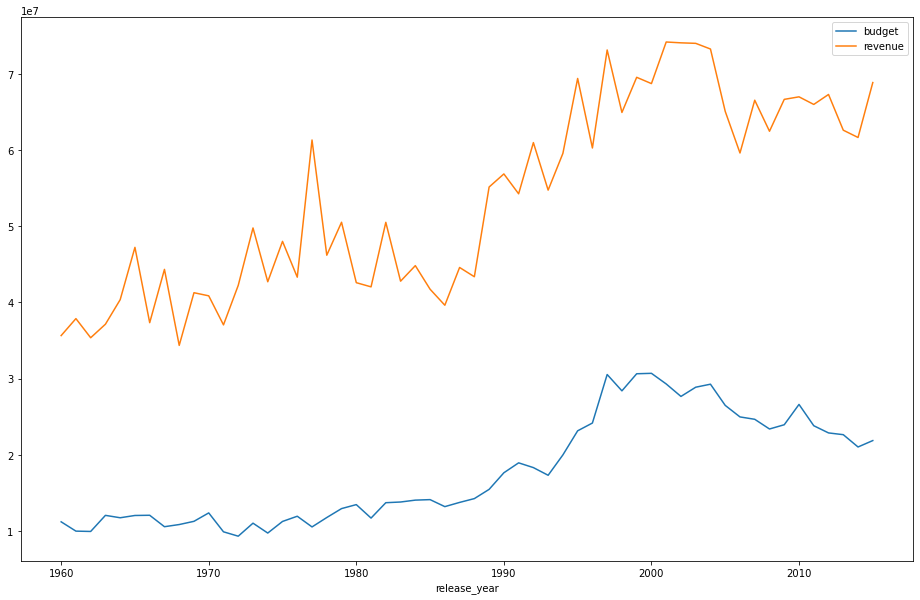

In [247]:
df.groupby(['release_year'])[['budget', 'revenue']].mean().plot(figsize=(16, 10));

<AxesSubplot:>

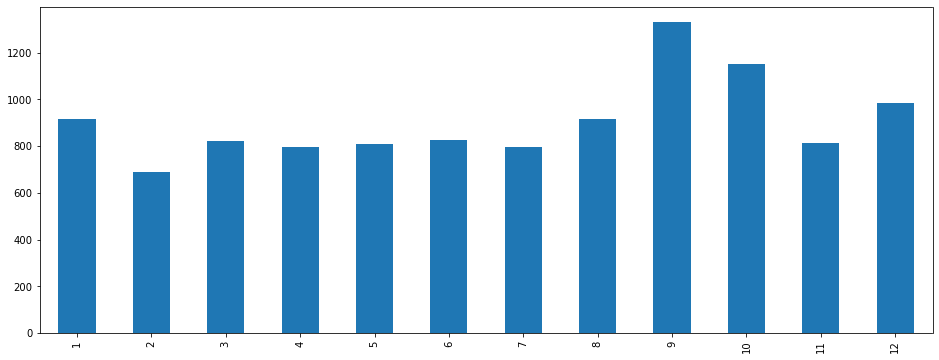

In [45]:
# calculate release month
df['release_month'] = df['release_date'].str.split(
    '/', expand=True)[0].astype(int)
df['release_month'].value_counts().sort_index().plot(kind='bar', figsize=(16, 6))

In [217]:
# most common genres
to_1D(df['genres'].dropna().str.strip('[]').str.split(',')).value_counts()[:10]

'Drama'               2452
 'Thriller'           2417
'Comedy'              2317
 'Drama'              2306
'Action'              1587
 'Romance'            1526
 'Comedy'             1473
 'Family'             1085
 'Science Fiction'    1010
 'Crime'               974
dtype: int64

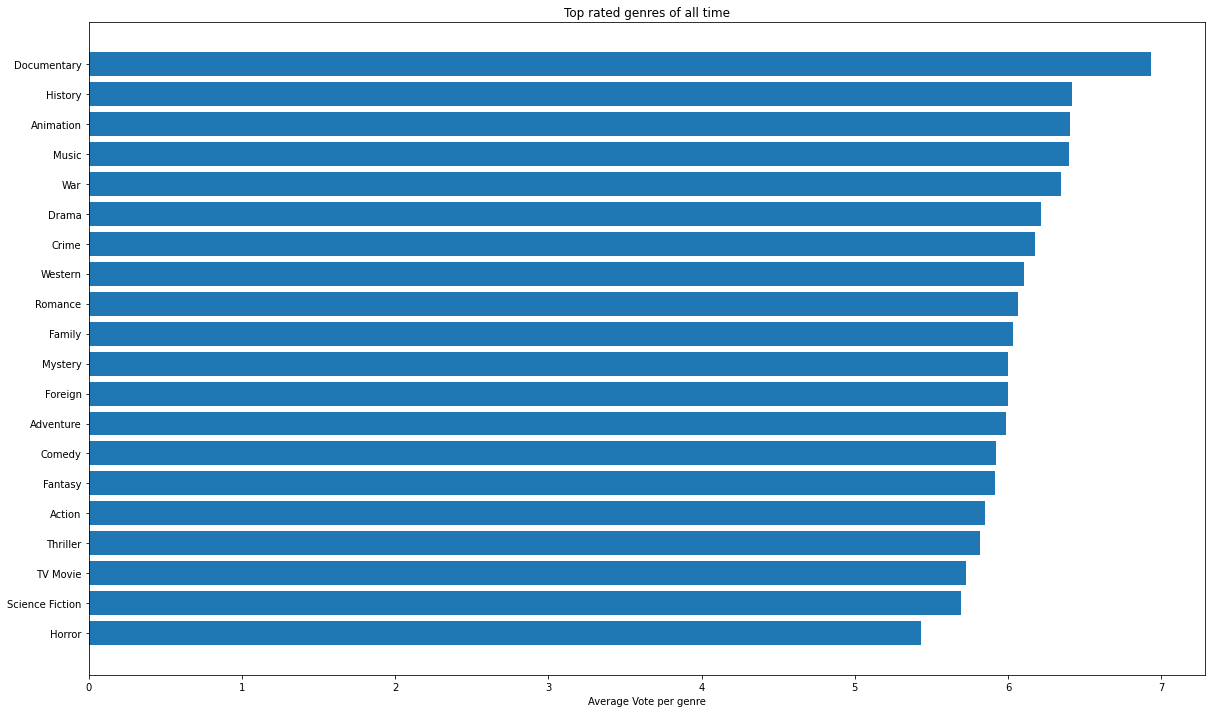

In [232]:
# a dictionary to hold the mean vote_average for each genre
genres = {}

for genre in unique['genres']:
    genres[genre] = df.dropna()[df.dropna()['genres'].str.contains(genre)]['vote_average'].mean()

data = pd.Series(genres).sort_values(ascending = False)
y = data.index
x = data.values

fig, ax = plt.subplots(figsize=(20,12))
ax.barh(y,x, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Average Vote per genre')
ax.set_title('Top rated genres of all time')

plt.show()


In [211]:
# Most common actors
to_1D(df.dropna()['cast'].str.strip('[]').str.split(',')).value_counts()[:10]

'Nicolas Cage'          48
 Jr.'                   45
'Bruce Willis'          39
'Robert De Niro'        39
'Clint Eastwood'        38
 'Samuel L. Jackson'    38
'Johnny Depp'           37
'Tom Hanks'             37
 'John Goodman'         36
 'Steve Buscemi'        36
dtype: int64

In [214]:
# The most common Production Companies
to_1D(df.dropna()['production_companies'].str.strip('[]').str.split(',')).value_counts()[:10]

'Universal Pictures'                        429
'Paramount Pictures'                        415
 'Warner Bros.'                             330
'Columbia Pictures'                         267
'Twentieth Century Fox Film Corporation'    236
'New Line Cinema'                           197
'Walt Disney Pictures'                      191
'Warner Bros.'                              165
'Miramax Films'                             129
'TriStar Pictures'                          120
dtype: int64

In [215]:
# the most common keywords
to_1D(df.dropna()['keywords'].str.strip('[]').str.split(',')).value_counts()[:10]

 'woman director'          236
 'independent film'        232
 'murder'                  177
 'based on novel'          150
 'sex'                     148
 'nudity'                  141
 'sport'                   139
'new york'                 133
 'duringcreditsstinger'    124
'based on novel'           121
dtype: int64

# Conclusion

Which genres are
most popular from
year to year? What
kinds of properties
are associated with
movies that have high
revenues?


# References

- [Scrape IMDB movie rating and details using python](https://dev.to/magesh236/scrape-imdb-movie-rating-and-details-3a7c)
- [pandas.Series.str.split](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html#pandas.Series.str.split)
- [Dealing with List Values in Pandas Dataframes](https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173)
- [Are you confused using Series.str.contains() and DataFrame.isin() then look into this article](https://medium.com/analytics-vidhya/filter-pandas-dataframe-rows-by-a-list-of-strings-e95c225822fa)